# 実験

# 2024/06/04 22:28
    3次元ずつピックアップして3次元空間にプロットしていくと，すべての成分が同じ値だったら一点にプロットされる
    従って，連続した3成分（スライディングウィンドウ）に限らず，3成分をサンプリングして3次元空間で表した結果は，全成分が同じ（その空間での対角線上にある）状態から近いか遠いかが分かる
    全成分が同じなら，各成分が別な意味を表すと考えられる場合，どの意味も含む＝乱数の一様分布状態と考えられる
    文章にノイズを加えていくと，埋め込みベクトルはその状態に近づくだろう
    全成分が同じならフィルトレーション結果はbirth=deathになるので，フィルトレーションで一様乱数から遠いかどうかが分かる
    それ以外の情報，どの方向に遠いかなど分かるかは不明
    

In [ ]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import homcloud.interface as hc



# データをリストとして定義
data = [
    ["昆虫（アリ）", 0.0001, 0.5, 1, 25, 100],
    ["鳥（スズメ）", 0.024, 16, 3, 20, 5],
    ["猫（家猫）", 4.5, 50, 15, 22, 4],
    ["猿（ニホンザル）", 10, 60, 25, 10, 1],
    ["人間", 70, 170, 80, 18, 1]
]

# Polarsのデータフレームを作成し、数値をFloat64として設定
df = pl.DataFrame(
    data,
    schema=[
        ("生物", pl.Utf8),
        ("体重(kg)", pl.Float64),
        ("体長(cm)", pl.Float64),
        ("寿命(年)", pl.Float64),
        ("生息地の平均気温(℃)", pl.Float64),
        ("繁殖力(年間の子供の数)", pl.Float64)
    ]
)

print(df)


# 各行から3次元ベクトルを作成し、新しい列として追加
vector1 = []
vector2 = []
vector3 = []

for i in range(df.shape[0]):
    row = df.row(i)
    vector1.append([row[1], row[2], row[3]])  # 体重, 体長, 寿命
    vector2.append([row[2], row[3], row[4]])  # 体長, 寿命, 生息地の平均気温
    vector3.append([row[3], row[4], row[5]])  # 寿命, 生息地の平均気温，繁殖力


# 新しい列としてデータフレームに追加
df = df.with_columns([
    pl.Series("ベクトル1(体重, 体長, 寿命)", vector1),
    pl.Series("ベクトル2(体長, 寿命, 生息地の平均気温)", vector2),
    pl.Series("ベクトル3(寿命, 生息地の平均気温，繁殖力)", vector2)
])

# 結果を表示
print(df)

# プロットを作成
fig = go.Figure()

for i in range(df.shape[0]):
    print("i=", i)
    
    fig = go.Figure()
    bio = df["生物"][i]
    v1 = np.array(vector1[i])
    v2 = np.array(vector2[i])
    v3 = np.array(vector3[i])
    print("v1=", v1)
    #fig.add_trace(go.Scatter3d(x=v1, y=v2, z=[0, 1, 2], mode='markers', name=bio))
    x = [v1[0], v2[0], v3[0]]
    y = [v1[1], v2[1], v3[1]]
    z = [v1[2], v2[2], v3[2]]
    print("x=", x)
    fig.add_trace(go.Scatter3d(x=x, y=y, z=y, mode='markers', name=bio))

    fig.update_layout(scene=dict(xaxis_title='体重(kg)', yaxis_title='体長(cm)', zaxis_title='寿命(年)'),
                  title=f'{bio}の特徴ベクトルの3次元プロット')
    
    filename = f"pointcloud-{i}.pdgm"
    emb = np.array(np.array([v1, v2, v3]))
    print("emb=", emb)
    #pdlist = hc.PDList.from_alpha_filtration(emb, save_to=filename,
    #                                      save_boundary_map=True)
    #print("pdlist=", pdlist.dth_diagram(2).birth_death_times())
    #fig.show()
    pdlist = hc.PDList.from_alpha_filtration(emb)


In [1]:
print("hello")

hello


In [4]:
!pip install -U homcloud polars


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 96.0 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: polars
    Found existing installation: polars 0.20.29
    Uninstalling polars-0.20.29:
      Successfully uninstalled polars-0.20.29

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /usr/bin/python3 -m pip install --upgrade pip


shape: (6, 7)
┌────────────────┬──────────┬──────────┬──────────┬────────────────┬───────────────┬───────────────┐
│ 生物           ┆ 体重(kg) ┆ 体長(cm) ┆ 寿命(年) ┆ 生息地の平均気 ┆ 繁殖力(年間の ┆ 移動速度(km/h │
│ ---            ┆ ---      ┆ ---      ┆ ---      ┆ 温(℃)          ┆ 子供の数)     ┆ )             │
│ str            ┆ f64      ┆ f64      ┆ f64      ┆ ---            ┆ ---           ┆ ---           │
│                ┆          ┆          ┆          ┆ f64            ┆ f64           ┆ f64           │
╞════════════════╪══════════╪══════════╪══════════╪════════════════╪═══════════════╪═══════════════╡
│ 昆虫（アリ）   ┆ 0.0001   ┆ 0.5      ┆ 1.0      ┆ 25.0           ┆ 100.0         ┆ 0.1           │
│ 鳥（スズメ）   ┆ 0.024    ┆ 15.0     ┆ 3.0      ┆ 20.0           ┆ 5.0           ┆ 20.0          │
│ 猫（家猫）     ┆ 4.5      ┆ 50.0     ┆ 15.0     ┆ 22.0           ┆ 4.0           ┆ 48.0          │
│ 猿（ニホンザル ┆ 10.0     ┆ 60.0     ┆ 25.0     ┆ 10.0           ┆ 1.0           ┆ 55.0          │
│ ）             ┆          ┆   

i= 1
v1= [ 0.024 15.     3.   ]
x= [0.024, 15.0, 3.0, 20.0]
emb= [[ 0.024 15.     3.   ]
 [15.     3.    20.   ]
 [ 3.    20.     5.   ]
 [20.     5.    20.   ]]
birth death= [[164.5        166.81148467]]


i= 2
v1= [ 4.5 50.  15. ]
x= [4.5, 50.0, 15.0, 22.0]
emb= [[ 4.5 50.  15. ]
 [50.  15.  22. ]
 [15.  22.   4. ]
 [22.   4.  48. ]]
birth death= [[577.25      623.9852061]]


i= 3
v1= [10. 60. 25.]
x= [10.0, 60.0, 25.0, 10.0]
emb= [[10. 60. 25.]
 [60. 25. 10.]
 [25. 10.  1.]
 [10.  1. 55.]]
birth death= [[ 987.5        1095.25      ]
 [1027.02174416 1227.64810838]]


i= 4
v1= [ 70. 170.  80.]
x= [70.0, 170.0, 80.0, 18.0]
emb= [[ 70. 170.  80.]
 [170.  80.  18.]
 [ 80.  18.   1.]
 [ 18.   1.  45.]]
birth death= [[7361.25       8122.5       ]
 [7518.02782643 8227.75831471]]


i= 5
v1= [ 60. 160.  80.]
x= [60.0, 160.0, 80.0, 18.0]
emb= [[ 60. 160.  80.]
 [160.  80.  18.]
 [ 80.  18.   1.]
 [ 18.   1.  45.]]
birth death= [[6701.25       7067.5       ]
 [6827.54158965 7305.47206203]]


bd= (2, 2)
bd= (1, 2)
bd= (1, 2)
bd= (2, 2)
bd= (2, 2)
bd= (2, 2)


/tmp/ipykernel_1354185/2775614273.py:105: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



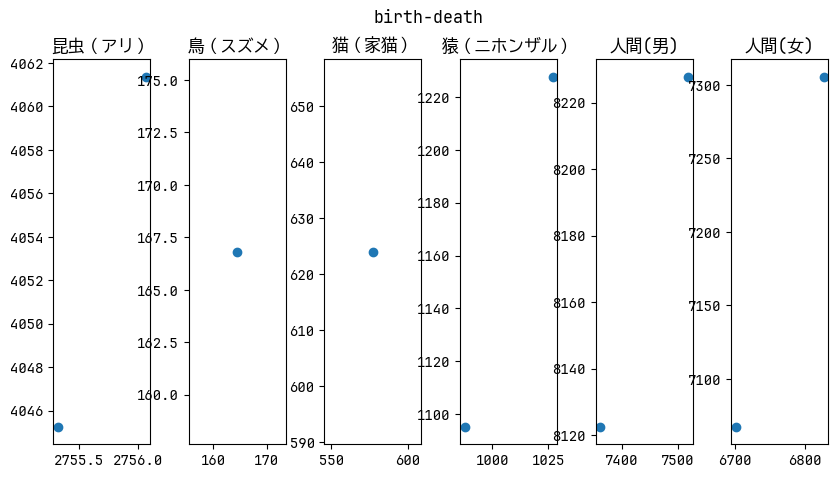

In [31]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import homcloud.interface as hc


plt.rcParams['font.family'] = 'UDEV Gothic 35NF'
# データをリストとして定義
data = [                                           
    ["昆虫（アリ）", 0.0001, 0.5, 1, 25, 100, 0.1],
    ["鳥（スズメ）", 0.024, 15, 3, 20, 5, 20],     
    ["猫（家猫）", 4.5, 50, 15, 22, 4, 48],        
    ["猿（ニホンザル）", 10, 60, 25, 10, 1, 55],   
    ["人間(男)", 70, 170, 80, 18, 1, 45],   
    ["人間(女)", 60, 160, 80, 18, 1, 45]   
]                                                  

# Polarsのデータフレームを作成し、数値をFloat64として設定
df = pl.DataFrame(                                 
    data,                                          
    schema=[                                       
        ("生物", pl.Utf8),                         
        ("体重(kg)", pl.Float64),                  
        ("体長(cm)", pl.Float64),                  
        ("寿命(年)", pl.Float64),                  
        ("生息地の平均気温(℃)", pl.Float64),       
        ("繁殖力(年間の子供の数)", pl.Float64),    
        ("移動速度(km/h)", pl.Float64)             
    ]                                              
)                                                  

print(df)


# 各行から3次元ベクトルを作成し、新しい列として追加
vector1 = []                                                                         
vector2 = []                                                                         
vector3 = []                                                                         
vector4 = []                                                                         
                                                                                     
for i in range(df.shape[0]):                                                         
    row = df.row(i)                                                                  
    vector1.append([row[1], row[2], row[3]])  # 体重, 体長, 寿命                     
    vector2.append([row[2], row[3], row[4]])  # 体長, 寿命, 生息地の平均気温         
    vector3.append([row[3], row[4], row[5]])  # 寿命, 生息地の平均気温，繁殖力       
    vector4.append([row[4], row[5], row[6]])  # 生息地の平均気温，繁殖力，移動速度   


# 新しい列としてデータフレームに追加
df = df.with_columns([
    pl.Series("ベクトル1(体重, 体長, 寿命)", vector1),
    pl.Series("ベクトル2(体長, 寿命, 生息地の平均気温)", vector2),
    pl.Series("ベクトル3(寿命, 生息地の平均気温，繁殖力)", vector3),
    pl.Series("ベクトル4(生息地の平均気温，繁殖力，移動速度)", vector4)
])

# 結果を表示
print(df)

# プロットを作成
fig = go.Figure()
birth_death_list = []
for i in range(df.shape[0]):
    print("i=", i)
    
    fig = go.Figure()
    bio = df["生物"][i]
    v1 = np.array(vector1[i])
    v2 = np.array(vector2[i])
    v3 = np.array(vector3[i])
    v4 = np.array(vector4[i])
    print("v1=", v1)
    #fig.add_trace(go.Scatter3d(x=v1, y=v2, z=[0, 1, 2], mode='markers', name=bio))
    x = [v1[0], v2[0], v3[0], v4[0]] 
    y = [v1[1], v2[1], v3[1], v4[1]] 
    z = [v1[2], v2[2], v3[2], v4[2]] 
    print("x=", x)
    fig.add_trace(go.Scatter3d(x=x, y=y, z=y, mode='markers', name=bio))

    fig.update_layout(scene=dict(xaxis_title='体重(kg)', yaxis_title='体長(cm)', zaxis_title='寿命(年)'),
                  title=f'{bio}の特徴ベクトルの3次元プロット')
    
    filename = f"pointcloud-{i}.pdgm"
    emb = np.array(np.array([v1, v2, v3, v4]))
    print("emb=", emb)
    pdlist = hc.PDList.from_alpha_filtration(emb, save_to=filename,
                                          save_boundary_map=True)
    birth_death = np.array(pdlist.dth_diagram(1).birth_death_times()).reshape(-1, 2)
    #print("pdlist=", pdlist.dth_diagram(1).birth_death_times())
    print("birth death=", birth_death)
    birth_death_list.append(birth_death)
    fig.show()

fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(hspace=0.6, wspace=0.4)
fig.suptitle(f"birth-death")
for (i, bd) in enumerate(birth_death_list):
    print("bd=", bd.shape)
    bio = df["生物"][i]
    ax = fig.add_subplot(1, len(data), i+1)
    ax.set_title(f"{bio}")
    ax.scatter(x=bd[:, 0], y=bd[:, 1])
fig.show()

In [7]:
import homcloud.interface as hc
print(hc)

<module 'homcloud.interface' from '/home/tetsu_sato1/.local/lib/python3.12/site-packages/homcloud/interface/__init__.py'>


In [8]:
import polars

ModuleNotFoundError: No module named 'polars'

In [29]:
import matplotlib.font_manager
print([f.name for f in matplotlib.font_manager.fontManager.ttflist])

['DejaVu Serif', 'STIXSizeThreeSym', 'STIXNonUnicode', 'cmex10', 'DejaVu Sans', 'STIXSizeOneSym', 'STIXSizeOneSym', 'DejaVu Sans', 'DejaVu Sans Mono', 'STIXSizeFourSym', 'STIXSizeFourSym', 'DejaVu Sans Mono', 'STIXSizeTwoSym', 'DejaVu Sans Mono', 'DejaVu Serif', 'cmb10', 'cmmi10', 'DejaVu Sans', 'cmtt10', 'STIXNonUnicode', 'STIXGeneral', 'STIXNonUnicode', 'STIXNonUnicode', 'cmr10', 'DejaVu Sans', 'STIXGeneral', 'DejaVu Serif', 'DejaVu Sans Display', 'DejaVu Serif', 'STIXSizeTwoSym', 'STIXGeneral', 'STIXSizeFiveSym', 'DejaVu Sans Mono', 'DejaVu Serif Display', 'cmsy10', 'cmss10', 'STIXSizeThreeSym', 'STIXGeneral', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Math TeX Gyre', 'DejaVu Sans', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Sans', 'DejaVu Serif', 'DejaVu Sans Mono', 'DejaVu Sans', 'DejaVu Serif', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Sans Mono', 'DejaVu Serif', 'UDEV Gothic

In [27]:
from matplotlib import font_manager
font_manager.fontManager.addfont("/research/fonts/UDEVGothic35NF-Regular.ttf")
matplotlib.rc("font", family="UDEVGothic-Regular")